# Project

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [12]:
rand_state = 1000

In [13]:
df = pd.read_csv("/Users/felipeacosta/Documents/GitHub/Project Data.vf.csv")

df.head()


,Unnamed: 0,Date,10Y-Yield,Volume,BTC,SPY,DIA,QQQ,XLE,USD/EUR,...,XLE lag 1,USD/EUR lag 1,Gold lag 1,BTC lag2,SPY lag2,DIA lag2,QQQ lag2,XLE lag2,USD/EUR lag2,Gold lag2
0,0,2013-04-29,0.0170,0.0,144.539993,134.630630,121.918114,64.611473,55.653862,0.76672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-04-30,0.0170,0.0,139.000000,134.951752,122.050079,65.080818,55.875160,0.76360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-05-01,0.0166,0.0,116.989998,133.768539,120.994621,64.777130,55.004242,0.75940,...,0.00398,-0.00407,0.00102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-05-02,0.0166,0.0,105.209999,135.010880,122.000618,65.596161,55.725235,0.75860,...,-0.01559,-0.00550,-0.00967,-0.03833,0.00239,0.00108,0.00726,0.00398,-0.00407,0.00102
4,4,2013-05-03,0.0178,0.0,97.750000,136.380020,123.155052,66.369186,56.731808,0.76540,...,0.01311,-0.00105,0.00997,-0.15835,-0.00877,-0.00865,-0.00467,-0.01559,-0.00550,-0.00967


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2042 non-null   int64  
 1   Date           2042 non-null   object 
 2   10Y-Yield      2042 non-null   float64
 3   Volume         2042 non-null   float64
 4   BTC            2042 non-null   float64
 5   SPY            2042 non-null   float64
 6   DIA            2042 non-null   float64
 7   QQQ            2042 non-null   float64
 8   XLE            2042 non-null   float64
 9   USD/EUR        2042 non-null   float64
 10  Gold           2042 non-null   object 
 11  BTC%           2041 non-null   float64
 12  SPY%           2041 non-null   float64
 13  DIA%           2041 non-null   float64
 14  QQQ%           2041 non-null   float64
 15  XLE%           2041 non-null   float64
 16  USD/EUR%       2041 non-null   float64
 17  Gold%          2041 non-null   float64
 18  BTC%.1  

In [15]:
df['Date']= pd.to_datetime(df['Date'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     2042 non-null   int64         
 1   Date           2042 non-null   datetime64[ns]
 2   10Y-Yield      2042 non-null   float64       
 3   Volume         2042 non-null   float64       
 4   BTC            2042 non-null   float64       
 5   SPY            2042 non-null   float64       
 6   DIA            2042 non-null   float64       
 7   QQQ            2042 non-null   float64       
 8   XLE            2042 non-null   float64       
 9   USD/EUR        2042 non-null   float64       
 10  Gold           2042 non-null   object        
 11  BTC%           2041 non-null   float64       
 12  SPY%           2041 non-null   float64       
 13  DIA%           2041 non-null   float64       
 14  QQQ%           2041 non-null   float64       
 15  XLE%           2041 n

In [17]:
df.drop(['Unnamed: 0','SPY','BTC','DIA','QQQ', 'USD/EUR','XLE','Gold'], axis=1, inplace=True)

In [18]:
df.head()

,Date,10Y-Yield,Volume,BTC%,SPY%,DIA%,QQQ%,XLE%,USD/EUR%,Gold%,...,XLE lag 1,USD/EUR lag 1,Gold lag 1,BTC lag2,SPY lag2,DIA lag2,QQQ lag2,XLE lag2,USD/EUR lag2,Gold lag2
0,2013-04-29,0.0170,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-30,0.0170,0.0,-0.038328,0.0024,0.0011,0.0073,0.0040,-0.0041,0.00102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-05-01,0.0166,0.0,-0.158345,-0.0088,-0.0086,-0.0047,-0.0156,-0.0055,-0.00967,...,0.00398,-0.00407,0.00102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-02,0.0166,0.0,-0.100692,0.0093,0.0083,0.0126,0.0131,-0.0011,0.00997,...,-0.01559,-0.00550,-0.00967,-0.03833,0.00239,0.00108,0.00726,0.00398,-0.00407,0.00102
4,2013-05-03,0.0178,0.0,-0.070906,0.0101,0.0095,0.0118,0.0181,0.0090,0.00000,...,0.01311,-0.00105,0.00997,-0.15835,-0.00877,-0.00865,-0.00467,-0.01559,-0.00550,-0.00967


In [19]:
df2=df.dropna()

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 3 to 2041
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2039 non-null   datetime64[ns]
 1   10Y-Yield      2039 non-null   float64       
 2   Volume         2039 non-null   float64       
 3   BTC%           2039 non-null   float64       
 4   SPY%           2039 non-null   float64       
 5   DIA%           2039 non-null   float64       
 6   QQQ%           2039 non-null   float64       
 7   XLE%           2039 non-null   float64       
 8   USD/EUR%       2039 non-null   float64       
 9   Gold%          2039 non-null   float64       
 10  BTC%.1         2039 non-null   float64       
 11  SPY lag1       2039 non-null   float64       
 12  DIA lag 1      2039 non-null   float64       
 13  QQQ lag 1      2039 non-null   float64       
 14  XLE lag 1      2039 non-null   float64       
 15  USD/EUR lag 1  2039 n

### Scaling the variables for Lasso, Ridge, Elastic, SVM, and KNN

In [21]:
df2=df.dropna()

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df_sc= df2.set_index('Date')


In [24]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df_sc)
df_sc

array([[-0.69978729, -0.56914445, -2.02849645, ...,  0.209035  ,
        -0.81514471,  0.09301429],
       [-0.51265933, -0.56914445, -1.45185041, ..., -0.85561375,
        -1.09753935, -1.03100327],
       [-0.48147133, -0.56914445,  2.80244472, ...,  0.70572601,
        -0.21875883,  1.03407671],
       ...,
       [-1.02726121,  1.13323297, -0.52549865, ..., -1.84573164,
        -0.2069101 , -0.39066024],
       [-0.98047922,  1.32216527, -0.89060026, ..., -0.27187941,
         0.20779532, -1.47892795],
       [-1.04285521,  1.36665116,  0.10820463, ...,  0.66710053,
         0.43687069,  0.44735847]])

In [25]:
df2.describe()

,10Y-Yield,Volume,BTC%,SPY%,DIA%,QQQ%,XLE%,USD/EUR%,Gold%,BTC%.1,...,XLE lag 1,USD/EUR lag 1,Gold lag 1,BTC lag2,SPY lag2,DIA lag2,QQQ lag2,XLE lag2,USD/EUR lag2,Gold lag2
count,2039.000000,2.039000e+03,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,...,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,0.021088,1.138673e+10,0.004089,0.000629,0.000572,0.000918,0.000150,0.000064,0.000146,0.004007,...,0.000144,0.000062,0.000140,0.004009,0.000620,0.000566,0.000913,0.000138,0.000058,0.000135
std,0.006414,2.001166e+10,0.051668,0.010634,0.011082,0.012583,0.018388,0.005063,0.009513,0.051792,...,0.018390,0.005065,0.009516,0.051791,0.010635,0.011084,0.012582,0.018386,0.005065,0.009513
min,0.005200,0.000000e+00,-0.371695,-0.109400,-0.127600,-0.119800,-0.201400,-0.030800,-0.058490,-0.371700,...,-0.201410,-0.030780,-0.058490,-0.371700,-0.109420,-0.127610,-0.119790,-0.201410,-0.030780,-0.058490
25%,0.017400,3.331555e+07,-0.015239,-0.003150,-0.003300,-0.003800,-0.007400,-0.002800,-0.004720,-0.015285,...,-0.007410,-0.002795,-0.004725,-0.015285,-0.003170,-0.003285,-0.003760,-0.007410,-0.002810,-0.004725
50%,0.022300,9.590450e+08,0.001942,0.000700,0.000800,0.001400,0.000200,0.000000,0.000000,0.001930,...,0.000240,0.000000,0.000000,0.001930,0.000680,0.000770,0.001380,0.000240,0.000000,0.000000
75%,0.026000,1.667075e+10,0.022643,0.005400,0.005300,0.007000,0.007950,0.003000,0.004760,0.022645,...,0.007955,0.003020,0.004760,0.022645,0.005390,0.005295,0.007025,0.007945,0.003020,0.004730
max,0.032400,3.509679e+11,0.683359,0.090600,0.110200,0.084700,0.160400,0.028500,0.052710,0.683360,...,0.160370,0.028540,0.052710,0.683360,0.090600,0.110190,0.084710,0.160370,0.028540,0.052710


In [26]:
df_sc = pd.DataFrame(df_sc, columns=['10Y-Yield','Volume','BTC%','SPY%','DIA%','QQQ%','XLE%','USD/EUR%','Gold%','BTC%.1','SPY lag1','DIA lag 1','QQQ lag 1','XLE lag 1','USD/EUR lag 1','Gold lag 1','BTC lag2','SPY lag2','DIA lag2','QQQ lag2','XLE lag2','USD/EUR lag2','Gold lag2'])
df_sc.head()

,10Y-Yield,Volume,BTC%,SPY%,DIA%,QQQ%,XLE%,USD/EUR%,Gold%,BTC%.1,...,XLE lag 1,USD/EUR lag 1,Gold lag 1,BTC lag2,SPY lag2,DIA lag2,QQQ lag2,XLE lag2,USD/EUR lag2,Gold lag2
0,-0.699787,-0.569144,-2.028496,0.815648,0.697476,0.928643,0.704427,-0.229972,1.032920,-3.135531,...,-0.855796,-1.098334,-1.031195,-0.817692,0.166519,0.046426,0.504600,0.209035,-0.815145,0.093014
1,-0.512659,-0.569144,-1.451850,0.890900,0.805781,0.865050,0.976415,1.765401,-0.015352,-2.021967,...,0.705221,-0.219528,1.033302,-3.135655,-0.883125,-0.831605,-0.443833,-0.855614,-1.097539,-1.031003
2,-0.481471,-0.569144,2.802445,0.176006,-0.006511,0.237067,0.361722,-0.881925,-0.015352,-1.446838,...,0.974455,1.757291,-0.014714,-2.022059,0.815492,0.698858,0.932309,0.705726,-0.218759,1.034077
3,-0.450283,-0.569144,-0.217078,0.420575,0.453788,-0.120645,0.410680,0.797349,-1.803828,2.797296,...,0.362015,-0.889000,-0.014714,-1.446914,0.895438,0.802633,0.863939,0.975016,1.758004,-0.014235
4,-0.465877,-0.569144,0.279545,0.373543,0.354508,0.308610,0.078854,-0.111435,1.710038,-0.214888,...,0.413686,0.791592,-1.802753,2.797343,0.180627,-0.008620,0.235890,0.362449,-0.888212,-0.014235


In [27]:
df_sc.describe()

,10Y-Yield,Volume,BTC%,SPY%,DIA%,QQQ%,XLE%,USD/EUR%,Gold%,BTC%.1,...,XLE lag 1,USD/EUR lag 1,Gold lag 1,BTC lag2,SPY lag2,DIA lag2,QQQ lag2,XLE lag2,USD/EUR lag2,Gold lag2
count,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,...,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03
mean,-2.980560e-16,-4.623842e-16,2.138500e-17,5.080128e-17,1.148882e-17,8.929700e-18,1.236001e-17,-1.339455e-17,-7.949611e-18,1.274116e-17,...,5.444939e-19,5.717186e-18,2.439333e-17,3.757008e-18,4.173886e-18,1.293173e-17,8.398818e-18,-1.197887e-17,1.796830e-18,-2.853148e-17
std,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,...,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00
min,-2.477503e+00,-5.691445e-01,-7.274918e+00,-1.034987e+01,-1.156814e+01,-9.596035e+00,-1.096387e+01,-6.097554e+00,-6.165145e+00,-7.255871e+00,...,-1.096270e+01,-6.090740e+00,-6.163005e+00,-7.256115e+00,-1.034967e+01,-1.156650e+01,-9.595858e+00,-1.096461e+01,-6.089803e+00,-6.164262e+00
25%,-5.750353e-01,-5.674792e-01,-3.741762e-01,-3.554610e-01,-3.494792e-01,-3.750175e-01,-4.107250e-01,-5.658267e-01,-5.116254e-01,-3.725756e-01,...,-4.108792e-01,-5.641386e-01,-5.113915e-01,-3.726203e-01,-3.564223e-01,-3.474698e-01,-3.714886e-01,-4.106047e-01,-5.663215e-01,-5.110531e-01
50%,1.890705e-01,-5.212084e-01,-4.156623e-02,6.689272e-03,2.056515e-02,3.833838e-02,2.697206e-03,-1.265402e-02,-1.535216e-02,-4.010947e-02,...,5.210744e-03,-1.216965e-02,-1.471380e-02,-4.014453e-02,5.686147e-03,1.845153e-02,3.714075e-02,5.571211e-03,-1.140612e-02,-1.423528e-02
75%,7.660484e-01,2.641120e-01,3.591833e-01,4.487948e-01,4.267114e-01,4.834909e-01,4.242790e-01,5.800310e-01,4.851267e-01,3.599508e-01,...,4.248361e-01,5.842333e-01,4.856430e-01,3.599273e-01,4.486812e-01,4.267855e-01,4.859175e-01,4.247393e-01,5.849798e-01,4.831083e-01
max,1.764064e+00,1.697333e+01,1.315017e+01,8.463134e+00,9.894432e+00,6.659982e+00,8.717202e+00,5.617854e+00,5.526716e+00,1.312007e+01,...,8.714816e+00,5.624036e+00,5.526002e+00,1.312041e+01,8.463034e+00,9.892463e+00,6.661865e+00,8.716977e+00,5.624638e+00,5.528044e+00


### Setting the features and target variables.

In [28]:
y = df_sc['BTC%']
X = df_sc.drop('BTC%', axis=1) # becareful inplace= False

In [29]:
from sklearn.model_selection import TimeSeriesSplit
#Specify fold and perform splitting
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
tscv.split(df_sc)

<generator object TimeSeriesSplit.split at 0x7fab9fc736d0>

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [35]:
y = df_sc['BTC%']
X = df_sc.drop('BTC%', axis=1)

split = int(0.70 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
###
X_train.head()

,10Y-Yield,Volume,SPY%,DIA%,QQQ%,XLE%,USD/EUR%,Gold%,BTC%.1,SPY lag1,...,XLE lag 1,USD/EUR lag 1,Gold lag 1,BTC lag2,SPY lag2,DIA lag2,QQQ lag2,XLE lag2,USD/EUR lag2,Gold lag2
0,-0.699787,-0.569144,0.815648,0.697476,0.928643,0.704427,-0.229972,1.032920,-3.135531,-0.883230,...,-0.855796,-1.098334,-1.031195,-0.817692,0.166519,0.046426,0.504600,0.209035,-0.815145,0.093014
1,-0.512659,-0.569144,0.890900,0.805781,0.865050,0.976415,1.765401,-0.015352,-2.021967,0.815310,...,0.705221,-0.219528,1.033302,-3.135655,-0.883125,-0.831605,-0.443833,-0.855614,-1.097539,-1.031003
2,-0.481471,-0.569144,0.176006,-0.006511,0.237067,0.361722,-0.881925,-0.015352,-1.446838,0.895252,...,0.974455,1.757291,-0.014714,-2.022059,0.815492,0.698858,0.932309,0.705726,-0.218759,1.034077
3,-0.450283,-0.569144,0.420575,0.453788,-0.120645,0.410680,0.797349,-1.803828,2.797296,0.180473,...,0.362015,-0.889000,-0.014714,-1.446914,0.895438,0.802633,0.863939,0.975016,1.758004,-0.014235
4,-0.465877,-0.569144,0.373543,0.354508,0.308610,0.078854,-0.111435,1.710038,-0.214888,0.418419,...,0.413686,0.791592,-1.802753,2.797343,0.180627,-0.008620,0.235890,0.362449,-0.888212,-0.014235


In [36]:
reg_model = LinearRegression() 

In [37]:
%%time 
reg_model.fit(X_train, y_train)

CPU times: user 14.4 ms, sys: 13.2 ms, total: 27.5 ms
Wall time: 42.6 ms


LinearRegression()

In [38]:
reg_model.score(X_test, y_test)

-0.15111508884483693

In [39]:
y_hat_test = reg_model.predict(X_test)

In [40]:
y_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat_test, 'resid': y_test - y_hat_test})
y_predictions.head()

,actuals,predictions,resid
1427,-0.183648,0.018812,-0.202461
1428,0.005842,-0.059957,0.065798
1429,-0.085078,0.089210,-0.174288
1430,-0.774614,-0.078419,-0.696195
1431,-0.203749,-0.095309,-0.108440


In [41]:
MSE_test = np.mean(np.square(y_predictions['resid']))
RMSE_test = np.sqrt(MSE_test)
print("The RMSE test is", np.round(RMSE_test,3))

The RMSE test is 0.995


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
# Running a 5 fold cross validation
my_estimator = LinearRegression()
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60), scoring="r2")
R2

array([-0.21856   , -0.04857744, -1.0123634 , -0.02652115, -0.09899371,
       -2.25868783, -0.41459399, -0.27665912, -0.15000771, -0.16028596])

In [44]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)
# The estimated version of R2 is .67

-0.467

In [45]:
MSE = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60), scoring="neg_mean_squared_error")

In [46]:
# Finding the estimated version of RMSE
RMSE = np.sqrt(MSE)
RMSE_CV5 = np.mean(RMSE)
np.round(RMSE_CV5,3)

1.118

### Packages for time series cross-validation

## Lasso Regression

In [50]:

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [51]:

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn import linear_model

In [52]:
# starting with default parameters:
model_lasso = Lasso()


In [53]:
%%time
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)


CPU times: user 11.5 ms, sys: 5.96 ms, total: 17.4 ms
Wall time: 18.5 ms


In [54]:
model_lasso.score(X_train, y_train)

0.0

In [55]:
model_lasso.score(X_test, y_test)

-0.0005056110566019623

In [57]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [58]:
tscv = cross_val_score(estimator = Lasso(), X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60) , scoring="r2" )
tscv

array([-0.00068814, -0.00347633, -0.01936965, -0.01144036, -0.01146538,
       -0.00300937, -0.02083573, -0.07123093, -0.09040543, -0.03977125])

In [59]:
round(tscv.mean(),3)

-0.027

In [60]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03,.035,.04,.05,.06,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}

In [61]:
grid = GridSearchCV(Lasso(),lasso_params,refit=True,verbose=2, cv=3)

In [62]:
%time grid.fit(X_train,y_train)

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ........................................alpha=0.024; total time=   0.0s
[CV] END ........................................alpha=0.024; total time=   0.0s
[CV] END ........................................alpha=0.024; total time=   0.0s
[CV] END ........................................alpha=0.025; total time=   0.0s
[CV] END ........................................alpha=0.025; total time=   0.0s
[CV] END ........................................alpha=0.025; total time=   0.0s
[CV] END ........................................alpha=0.026; total time=   0.0s
[CV] END ........................................alpha=0.026; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03, 0.035, 0.04,
                                   0.05, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1]},
             verbose=2)

In [63]:
grid.best_params_

{'alpha': 0.1}

In [64]:
lassoopt=Lasso(alpha=.1)

In [65]:
%%time
y_hat_lasso = lassoopt.fit(X_train, y_train).predict(X_test)


CPU times: user 10 ms, sys: 15.2 ms, total: 25.2 ms
Wall time: 23.4 ms


In [66]:
lassoopt.score(X_train, y_train)

0.0

In [67]:
lassoopt.score(X_test, y_test)

-0.0005056110566019623

In [68]:
tscv = cross_val_score(estimator = lassoopt, X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60) , scoring="r2" )
tscv

array([-0.00068814, -0.00347633, -0.02680571, -0.01028603, -0.01146538,
       -0.00300937, -0.02083573, -0.07439808, -0.0795979 , -0.04038808])

In [69]:
round(tscv.mean(),3)

-0.027

In [70]:
df_predictions_optimal  = pd.DataFrame({'y_test':y_test,
                               'y_hat_lasso':y_hat_lasso})

In [71]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.928

## Ridge Regression

In [72]:
# starting with default parameters:
model_ridge = Ridge()


In [73]:
%%time
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)


CPU times: user 24.7 ms, sys: 11.2 ms, total: 35.9 ms
Wall time: 39.8 ms


In [74]:
model_ridge.score(X_train, y_train)

0.010837455589755796

In [75]:
model_ridge.score(X_test, y_test)

-0.13849722591317692

In [76]:
tscv = cross_val_score(estimator = Ridge(), X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60) , scoring="r2" )
tscv

array([-0.1451793 , -0.07183218, -0.16315053, -0.02996229, -0.11798595,
       -0.16453385, -0.39554207, -0.21071032, -0.14539303, -0.12083986])

In [77]:
round(tscv.mean(),3)

-0.157

In [78]:
ridge_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03,.035,.04,.05,.06,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}

In [79]:
grid = GridSearchCV(Ridge(),ridge_params,refit=True,verbose=2, cv=3)

In [80]:
%time grid.fit(X_train,y_train)

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ........................................alpha=0.024; total time=   0.0s
[CV] END ........................................alpha=0.024; total time=   0.0s
[CV] END ........................................alpha=0.024; total time=   0.0s
[CV] END ........................................alpha=0.025; total time=   0.0s
[CV] END ........................................alpha=0.025; total time=   0.0s
[CV] END ........................................alpha=0.025; total time=   0.0s
[CV] END ........................................alpha=0.026; total time=   0.0s
[CV] END ........................................alpha=0.026; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03, 0.035, 0.04,
                                   0.05, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1]},
             verbose=2)

In [81]:
grid.best_params_

{'alpha': 0.1}

In [82]:
ridgeopt=Ridge(alpha=.1)

In [83]:
%%time
y_hat_ridge = ridgeopt.fit(X_train, y_train).predict(X_test)


CPU times: user 10.3 ms, sys: 1.54 ms, total: 11.8 ms
Wall time: 9.14 ms


In [84]:
ridgeopt.score(X_train, y_train)

0.010845465731866621

In [85]:
ridgeopt.score(X_test, y_test)

-0.14977306980640148

In [86]:
tscv = cross_val_score(estimator = ridgeopt, X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60) , scoring="r2" )
tscv

array([-0.20756317, -0.0995212 , -0.16916363, -0.03316842, -0.10304927,
       -1.3082592 , -0.41333454, -0.26602579, -0.148029  , -0.15397965])

In [87]:
round(tscv.mean(),3)

-0.29

In [88]:
df_predictions_optimal  = pd.DataFrame({'y_test':y_test,
                               'y_hat_ridge':y_hat_ridge})

In [89]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.995

## Elastic Net

In [90]:
# starting with default parameters:
model_elastic = ElasticNet()


In [91]:
%%time
y_hat_elastic = model_elastic.fit(X_train, y_train).predict(X_test)


CPU times: user 6.83 ms, sys: 2.12 ms, total: 8.95 ms
Wall time: 9.23 ms


In [92]:
model_elastic.score(X_train, y_train)

0.0

In [93]:
model_elastic.score(X_test, y_test)

-0.0005056110566019623

In [94]:
tscv = cross_val_score(estimator = ElasticNet(), X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60) , scoring="r2" )
tscv

array([-0.00068814, -0.00347633, -0.01936965, -0.01144036, -0.01146538,
       -0.00300937, -0.02083573, -0.07123093, -0.09040543, -0.03977125])

In [95]:
round(tscv.mean(),3)

-0.027

In [96]:
elastic_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03,.035,.04,.05,.06,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}

In [97]:
grid = GridSearchCV(ElasticNet(), elastic_params,refit=True,verbose=2, cv=3)

In [98]:
%time grid.fit(X_train,y_train)

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ........................................alpha=0.024; total time=   0.0s
[CV] END ........................................alpha=0.024; total time=   0.0s
[CV] END ........................................alpha=0.024; total time=   0.0s
[CV] END ........................................alpha=0.025; total time=   0.0s
[CV] END ........................................alpha=0.025; total time=   0.0s
[CV] END ........................................alpha=0.025; total time=   0.0s
[CV] END ........................................alpha=0.026; total time=   0.0s
[CV] END ........................................alpha=0.026; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03, 0.035, 0.04,
                                   0.05, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1]},
             verbose=2)

In [99]:
grid.best_params_

{'alpha': 0.2}

In [100]:
elasticopt=Ridge(alpha=.2)

In [101]:
%%time
y_hat_elastic = elasticopt.fit(X_train, y_train).predict(X_test)


CPU times: user 7.74 ms, sys: 1.49 ms, total: 9.23 ms
Wall time: 8.7 ms


In [102]:
elasticopt.score(X_train, y_train)

0.010845194756606613

In [103]:
elasticopt.score(X_test, y_test)

-0.14844990444197248

In [104]:
tscv = cross_val_score(estimator = elasticopt, X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60) , scoring="r2" )
tscv

array([-0.19728417, -0.09518791, -0.16640742, -0.03388862, -0.10727067,
       -0.86880881, -0.41183494, -0.25673583, -0.14663735, -0.14844878])

In [105]:
round(tscv.mean(),3)

-0.243

In [106]:
df_predictions_optimal  = pd.DataFrame({'y_test':y_test,
                               'y_hat_elastic':y_hat_elastic})

In [107]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_elastic']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.994

## KNN

In [108]:
from sklearn.neighbors import KNeighborsRegressor

In [109]:
# Fitting KNN regression to the Training set

KNN_regression = KNeighborsRegressor()


In [110]:
%%time
KNN_regression.fit(X_train, y_train)

CPU times: user 2.75 ms, sys: 105 µs, total: 2.86 ms
Wall time: 2.87 ms


KNeighborsRegressor()

In [111]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test)

In [112]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
1427,-0.183648,0.050745
1428,0.005842,-0.101837
1429,-0.085078,-0.202240
1430,-0.774614,2.485503
1431,-0.203749,-0.222850


In [113]:
KNN_regression.score(X_train, y_train)

0.19839428229075173

In [114]:
KNN_regression.score(X_test, y_test)

-0.14712219334893928

In [115]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60) , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2), 'K':range(1,k)})

In [116]:
np.argmin(optimal_k['RMSE_CV'])

16

In [117]:
optimal_k.loc[np.argmin(optimal_k['RMSE_CV']), 'K']

17

Use the optimal K

In [118]:
%%time
KNN_regression = KNeighborsRegressor(n_neighbors=17)
KNN_regression.fit(X_train, y_train)

CPU times: user 3.06 ms, sys: 150 µs, total: 3.21 ms
Wall time: 3.72 ms


KNeighborsRegressor(n_neighbors=17)

In [119]:
KNN_regression.score(X_train, y_train)

0.0523601346173963

In [120]:
KNN_regression.score(X_test, y_test)

-0.05008253256098194

## SVR

In [121]:
from sklearn.svm import SVR

In [122]:
# Fitting SVM regression to the Training set
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

In [123]:
%%time
SVM_regression.fit(X_train, y_train)

CPU times: user 191 ms, sys: 7.45 ms, total: 198 ms
Wall time: 247 ms


SVR()

In [124]:
# Predicting the Test set results
y_hat = SVM_regression.predict(X_test)

In [125]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
1427,-0.183648,0.031899
1428,0.005842,-0.002844
1429,-0.085078,-0.324287
1430,-0.774614,-0.338064
1431,-0.203749,-0.307989


In [126]:
SVM_regression.score(X_test, y_test)

-0.0026814503233207887

In [127]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.93

### Tuning the hyperparameters

In [128]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [131]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 , scoring=None)
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [132]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [133]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [134]:
grid.best_estimator_

SVR(C=1, gamma=1)

In [135]:
y_hat_optimized = grid.predict(X_test)

In [136]:
predictions['y_hat_optimized'] = y_hat_optimized


In [137]:
grid.score(X_test, y_test)

-0.001679965313757803

In [138]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.93

In [139]:
tscv = cross_val_score(estimator = SVR(), X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60) , scoring="r2" )
tscv

array([-0.02724464,  0.03136463, -0.02582397,  0.03304121, -0.07490672,
        0.01047118, -0.02471135, -0.1122449 , -0.25044489, -0.13874912])

In [140]:

round(tscv.mean(),3)

-0.058

# Basic Decision Tree

In [141]:
from sklearn.tree import DecisionTreeRegressor

In [142]:
# Fitting regression tree to the Training set
Tree_regressor = DecisionTreeRegressor()


In [143]:
%%time
Tree_regressor.fit(X_train, y_train)

CPU times: user 80.1 ms, sys: 4.65 ms, total: 84.8 ms
Wall time: 153 ms


DecisionTreeRegressor()

In [144]:
# Predicting the Test set results
y_hat = Tree_regressor.predict(X_test)

In [145]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
1427,-0.183648,0.039855
1428,0.005842,0.090494
1429,-0.085078,0.103912
1430,-0.774614,-0.576971
1431,-0.203749,0.295495


In [146]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

2.23

In [147]:
Tree_regressor.score(X_train, y_train)

1.0

In [149]:
# This is not applicable

In [150]:
Tree_regressor.score(X_test, y_test)

-4.776464054556485

In [151]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

2.23

In [152]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [153]:
path

{'ccp_alphas': array([0.00000000e+00, 2.10634268e-12, 2.51824568e-11, ...,
        1.27260900e-02, 2.00367678e-02, 3.21724659e-02]),
 'impurities': array([-4.80950163e-17,  2.10629459e-12,  2.72887513e-11, ...,
         8.27058900e-01,  1.02742658e+00,  1.05959904e+00])}

In [154]:
RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=240, gap=1 , test_size=60) , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

,alpha,RMSE_CV
0,0.000000e+00,1.520963
1,2.106343e-12,1.520963
2,2.518246e-11,1.520963
3,1.097236e-10,1.520963
4,1.101643e-10,1.520963


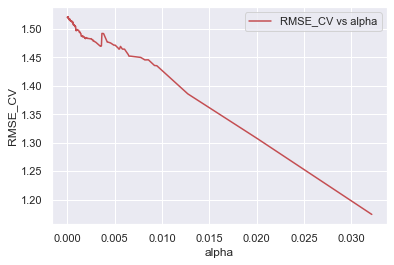

In [155]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.show()

In [156]:
np.argmin(output['RMSE_CV'])

1314

In [157]:
output.iloc[np.argmin(output['RMSE_CV']),]

alpha      0.032172
RMSE_CV    1.173772
Name: 1314, dtype: float64

In [158]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

0.032172465912821524

Refit the DTs regressor with optimal alpha!

In [159]:
optimal_DT = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

In [160]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.93

In [161]:
optimal_DT.score(X_test, y_test)

-0.0005056110566021843

# Random Forest

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
%%time
RF_regressor = RandomForestRegressor(bootstrap='False')
RF_regressor.fit(X_train, y_train)

CPU times: user 4.12 s, sys: 49.1 ms, total: 4.17 s
Wall time: 4.9 s


RandomForestRegressor(bootstrap='False')

In [164]:
# Predicting the Test set results
y_hat = RF_regressor.predict(X_test)


In [165]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
1427,-0.183648,0.099284
1428,0.005842,-0.117739
1429,-0.085078,-0.238253
1430,-0.774614,-0.272972
1431,-0.203749,-0.657991


In [166]:
np.round(RF_regressor.score(X_test, y_test),4)

-0.1759

In [167]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

1.0

In [168]:
my_param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}

In [169]:
grid = GridSearchCV(estimator=RandomForestRegressor(bootstrap=False,random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [170]:
%time grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.5s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.5s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.5s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=500; total time=   2.2s
[CV] END ...max_depth=5, max_features=sqrt, n_es

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(bootstrap=False,
                                             random_state=1000),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [171]:
grid.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}

In [172]:
grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=5, max_features='sqrt',
                      n_estimators=500, random_state=1000)

In [173]:
y_hat_opt = grid.predict(X_test)

In [174]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat_opt})
predictions.head()

,y_test,y_hat
1427,-0.183648,-0.014010
1428,0.005842,-0.031829
1429,-0.085078,-0.067477
1430,-0.774614,-0.019949
1431,-0.203749,-0.093238


In [175]:
np.round(grid.score(X_test, y_test),4)

-0.0221

In [176]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.94

### Feature Importance

In [177]:
features = list(X_train.columns)
features

['10Y-Yield',
 'Volume',
 'SPY%',
 'DIA%',
 'QQQ%',
 'XLE%',
 'USD/EUR%',
 'Gold%',
 'BTC%.1',
 'SPY lag1',
 'DIA lag 1',
 'QQQ lag 1',
 'XLE lag 1',
 'USD/EUR lag 1',
 'Gold lag 1',
 'BTC lag2',
 'SPY lag2',
 'DIA lag2',
 'QQQ lag2',
 'XLE lag2',
 'USD/EUR lag2',
 'Gold lag2']

In [179]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [180]:
importance = RF_Regressor.feature_importances_
importance

array([0.04215772, 0.06792103, 0.03927034, 0.03994348, 0.04745993,
       0.03736655, 0.04039712, 0.04522999, 0.09562891, 0.03532475,
       0.03833527, 0.03559765, 0.03788922, 0.04695072, 0.0410525 ,
       0.07075421, 0.03686608, 0.03548373, 0.0358457 , 0.03529021,
       0.03948095, 0.05575396])

In [181]:
FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
19,XLE lag2,0.035290
9,SPY lag1,0.035325
17,DIA lag2,0.035484
11,QQQ lag 1,0.035598
18,QQQ lag2,0.035846
16,SPY lag2,0.036866
5,XLE%,0.037367
12,XLE lag 1,0.037889
10,DIA lag 1,0.038335
2,SPY%,0.039270


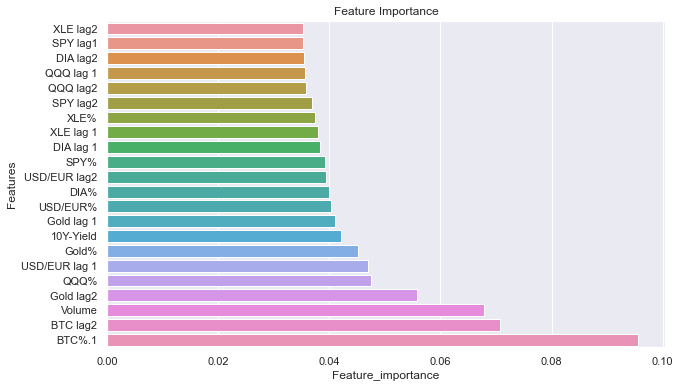

In [182]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

---
---